# Modele analizy danych

Tomasz Rodak

---

### Zadanie

Celem zadania jest budowa klasyfikatora odróżniającego autorów tekstu na podstawie statystyk zliczeń słów, z wykorzystaniem regresji Poissona i regresji logistycznej. Regresja Poissona posłuży do wyboru cech (słów) najbardziej różnicujących autorów; regresja logistyczna będzie klasyfikatorem.



#### 1.
Pobierz dwa długie teksty literackie **dwóch różnych autorów** w formacie `.txt` (np. z portalu *wolnelektury.pl*).



In [5]:
import re
from collections import Counter
import pandas as pd
import numpy as np
import requests

from sklearn.linear_model import PoissonRegressor, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

In [6]:
url = 'https://wolnelektury.pl/media/book/txt/w-pustyni-i-w-puszczy.txt'
response = requests.get(url)
response.raise_for_status()
w_pustyni = response.text

url = 'https://wolnelektury.pl/media/book/txt/lalka-tom-pierwszy.txt'
response = requests.get(url)
response.raise_for_status()
lalka = response.text

url = 'https://wolnelektury.pl/media/book/txt/lalka-tom-drugi.txt'
response = requests.get(url)
response.raise_for_status()
lalka += response.text


In [7]:
len(w_pustyni), len(lalka)

(644970, 1648077)

In [10]:
w_pustyni[:1000]

'Henryk Sienkiewicz\r\n\r\nW pustyni i w puszczy\r\n\r\nISBN 978-83-288-2842-1\r\n\r\n\r\n\r\n\r\nROZDZIAŁ I\r\n\r\n— Wiesz, Nel — mówił Staś Tarkowski do swojej przyjaciółki, małej Angielki — wczoraj przyszli zabtie (policjanci) i aresztowali żonę dozorcy Smaina i jej troje dzieci — tę Fatmę, która już kilka razy przychodziła do biura do twojego ojca i do mego.\r\n\r\nA mała, podobna do ślicznego obrazka Nel podniosła swe zielonawe oczy na Stasia i zapytała na wpół ze zdziwieniem, a na wpół ze strachem:\r\n\r\n— Wzięli ją do więzienia?\r\n\r\n— Nie, ale nie pozwolili jej wyjechać do Sudanu i przyjechał urzędnik, który jej będzie pilnował, by ani krokiem nie wyruszyła z Port-Saidu.\r\n\r\n— Dlaczego?\r\n\r\nStaś, który kończył rok czternasty i który swą ośmioletnią towarzyszkę kochał bardzo, ale uważał za zupełne dziecko, rzekł z miną wielce zarozumiałą:\r\n\r\n— Jak dojdziesz do mego wieku, to będziesz wiedziała wszystko, co się dzieje nie tylko wzdłuż kanału, od Port-Saidu do Suezu, 

In [11]:
lalka[:1000]

'Bolesław Prus\r\n\r\nLalka\r\n\r\nISBN 978-83-288-2673-1\r\n\r\n\r\n\r\n\r\n\r\nTom I\r\n\r\n\r\n\r\nI. Jak wygląda firma J. Mincel i S. Wokulski przez szkło butelek?\r\n\r\nW początkach roku 1878, kiedy świat polityczny zajmował się pokojem san-stefańskim, wyborem nowego papieża albo szansami europejskiej wojny, warszawscy kupcy tudzież inteligencja pewnej okolicy Krakowskiego Przedmieścia niemniej gorąco interesowała się przyszłością galanteryjnego sklepu pod firmą J. Mincel i S. Wokulski.\r\n\r\nW renomowanej jadłodajni, gdzie na wieczorną przekąskę zbierali się właściciele składów bielizny i składów win, fabrykanci powozów i kapeluszy, poważni ojcowie rodzin, utrzymujący się z własnych funduszów, i posiadacze kamienic bez zajęcia, równie dużo mówiono o uzbrojeniach Anglii, jak o firmie J. Mincel i S. Wokulski. Zatopieni w kłębach dymu cygar i pochyleni nad butelkami z ciemnego szkła obywatele tej dzielnicy, jedni zakładali się o wygranę lub przegranę Anglii, drudzy o bankructwo Wo

#### 2.
Przeprowadź **tokenizację**, tzn. zamień tekst na sekwencję słów (tokenów), usuwając interpunkcję i rozróżnienie wielkich liter.



In [14]:
def tokenize(text):
    text = text.lower()
    return re.findall(r'\w+', text)

In [15]:
t1 = tokenize(w_pustyni)
t2 = tokenize(lalka)

In [19]:
t1[10_000:10_010]

['beduinów',
 'oraz',
 'idrysa',
 'i',
 'gebhra',
 'z',
 'siedmiu',
 'wielbłądami',
 'z',
 'których']

In [18]:
t2[10_000:10_010]

['basta',
 'nie',
 'miałem',
 'po',
 'co',
 'wracać',
 'odparł',
 'niecierpliwie',
 'wokulski',
 'umrzeć']


3.

Podziel każdy tekst na segmenty o stałej długości (np. 500 tokenów) i wyznacz wspólną listę (k) najczęstszych słów w całym korpusie.


In [20]:
ct = Counter(t1 + t2)

[('i', 11177),
 ('się', 9557),
 ('w', 7164),
 ('nie', 7059),
 ('na', 6245),
 ('z', 5577),
 ('że', 4652),
 ('do', 4295),
 ('a', 3853),
 ('to', 3387)]

In [21]:
k = 30
ct.most_common(k)

[('i', 11177),
 ('się', 9557),
 ('w', 7164),
 ('nie', 7059),
 ('na', 6245),
 ('z', 5577),
 ('że', 4652),
 ('do', 4295),
 ('a', 3853),
 ('to', 3387),
 ('ale', 2444),
 ('o', 2205),
 ('pan', 2132),
 ('za', 1931),
 ('co', 1921),
 ('po', 1823),
 ('jak', 1812),
 ('wokulski', 1679),
 ('tak', 1611),
 ('jest', 1549),
 ('mu', 1452),
 ('od', 1389),
 ('go', 1325),
 ('już', 1313),
 ('tylko', 1255),
 ('mnie', 1132),
 ('jej', 1101),
 ('pani', 1077),
 ('ja', 1072),
 ('nawet', 1040)]

In [24]:
features = [word for word, _ in ct.most_common(k)]
features

['i',
 'się',
 'w',
 'nie',
 'na',
 'z',
 'że',
 'do',
 'a',
 'to',
 'ale',
 'o',
 'pan',
 'za',
 'co',
 'po',
 'jak',
 'wokulski',
 'tak',
 'jest',
 'mu',
 'od',
 'go',
 'już',
 'tylko',
 'mnie',
 'jej',
 'pani',
 'ja',
 'nawet']

#### 4.
Zbuduj **zbiór danych**: dla każdego segmentu policz liczby wystąpień wybranych słów oraz zapisz długość segmentu i etykietę autora. Wynikiem ma być ramka danych `pandas.DataFrame`.



In [56]:
segment_length = 900
n1, n2 = len(t1)//segment_length, len(t2)//segment_length
data = np.zeros((n1 + n2, k + 2))

#t1
for i in range(n1):
    segment = t1[i*segment_length:(i+1)*segment_length]
    data[i, 0] = 0 #autor od w_pustyni
    data[i, 1] = len(segment)
    data[i, 2:] = np.array([segment.count(word) for word in features])

#t2
for i in range(n2):
    segment = t2[i*segment_length:(i+1)*segment_length]
    data[n1 + i, 0] = 1 #autor od lalka
    data[n1 + i, 1] = len(segment)
    data[n1 + i, 2:] = np.array([segment.count(word) for word in features])

df = pd.DataFrame(data, columns=["autor", "L"] + features)

In [57]:
df

,autor,L,i,się,w,nie,na,z,że,do,...,mu,od,go,już,tylko,mnie,jej,pani,ja,nawet
0,0.0,900.0,28.0,18.0,16.0,23.0,11.0,16.0,12.0,23.0,...,1.0,5.0,0.0,3.0,5.0,3.0,6.0,0.0,0.0,2.0
1,0.0,900.0,54.0,18.0,34.0,9.0,10.0,14.0,4.0,15.0,...,2.0,4.0,4.0,2.0,3.0,0.0,2.0,1.0,0.0,2.0
2,0.0,900.0,39.0,16.0,15.0,20.0,21.0,15.0,14.0,17.0,...,1.0,7.0,0.0,3.0,2.0,0.0,3.0,3.0,0.0,1.0
3,0.0,900.0,43.0,19.0,19.0,14.0,10.0,8.0,10.0,11.0,...,1.0,5.0,1.0,3.0,2.0,0.0,2.0,1.0,0.0,1.0
4,0.0,900.0,27.0,18.0,22.0,25.0,12.0,12.0,16.0,15.0,...,3.0,3.0,4.0,2.0,4.0,3.0,7.0,0.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,1.0,900.0,22.0,30.0,21.0,17.0,17.0,15.0,13.0,11.0,...,9.0,4.0,6.0,2.0,5.0,0.0,2.0,4.0,2.0,3.0
381,1.0,900.0,21.0,31.0,21.0,19.0,15.0,11.0,20.0,7.0,...,3.0,2.0,8.0,3.0,6.0,2.0,0.0,0.0,5.0,3.0
382,1.0,900.0,26.0,29.0,17.0,17.0,9.0,14.0,9.0,14.0,...,7.0,4.0,2.0,3.0,4.0,8.0,1.0,1.0,7.0,0.0
383,1.0,900.0,29.0,33.0,23.0,11.0,17.0,17.0,8.0,17.0,...,9.0,1.0,4.0,3.0,7.0,4.0,1.0,0.0,4.0,1.0


In [58]:
len(df)

385

In [59]:
#podzial na dane testowe i treningowe
df_train, df_test = train_test_split(df, test_size=0.3, random_state=43)

In [60]:
len(df_train), len(df_test)

(269, 116)

In [61]:
full_model = LogisticRegression(max_iter=1000)
full_model.fit(df_train[features], df_train["autor"])

LogisticRegression(max_iter=1000)

In [62]:
y_pred = full_model.predict(df_test[features])
accuracy_score(df_test["autor"], y_pred)

0.9827586206896551

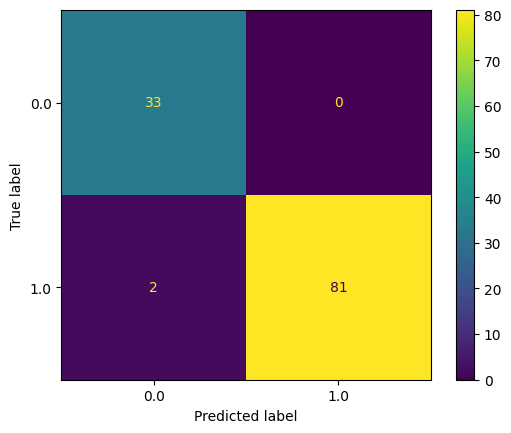

In [63]:
ConfusionMatrixDisplay.from_predictions(df_test["autor"], y_pred)

#### 5.

Dla każdego słowa dopasuj jednowymiarowy model regresji Poissona

\begin{equation*}
   \text{liczba wystąpień w segmencie}\mid \text{autor} \sim \text{Poisson}(\lambda_{\text{autor}}\cdot \text{ długość segmentu})
\end{equation*}

stosując **offset** równy $\log(\text{długość segmentu})$.
Offset uwzględnia fakt, że dłuższe segmenty mają proporcjonalnie większą oczekiwaną liczbę wystąpień słów.



In [65]:
poisson_results = []
for word in features:
    model = PoissonRegressor()
    model.fit(df_train[[word]].values.reshape(-1, 1), df_train["autor"], sample_weight=df_train["L"])
    poisson_results.append((word, model.coef_[0]))

In [66]:
sorted(poisson_results, key=lambda x: np.abs(x[1]), reverse=True)[:15]

[('po', np.float64(-0.09982267938985792)),
 ('mnie', np.float64(0.08625373480165735)),
 ('ja', np.float64(0.07408403763429534)),
 ('nawet', np.float64(0.0703425324267148)),
 ('wokulski', np.float64(0.06841380640278973)),
 ('już', np.float64(0.058713373129462745)),
 ('jest', np.float64(0.055376568550221654)),
 ('co', np.float64(0.05431664356344887)),
 ('i', np.float64(-0.0521800072841262)),
 ('za', np.float64(0.05086052685832219)),
 ('pan', np.float64(0.03774491846026529)),
 ('o', np.float64(0.036320864615781004)),
 ('tak', np.float64(-0.036316291556460066)),
 ('pani', np.float64(0.03121117657136708)),
 ('ale', np.float64(-0.029689938821136068))]

In [75]:
top = 4
top_features = [word for word, _ in sorted(poisson_results, key=lambda x: np.abs(x[1]), reverse=True)[:top]]
top_features

['po', 'mnie', 'ja', 'nawet']

In [76]:
model = LogisticRegression()
model.fit(df_train[top_features], df_train["autor"])

LogisticRegression()

In [77]:
y_pred = model.predict(df_test[top_features])
accuracy_score(df_test["autor"], y_pred)

0.8793103448275862

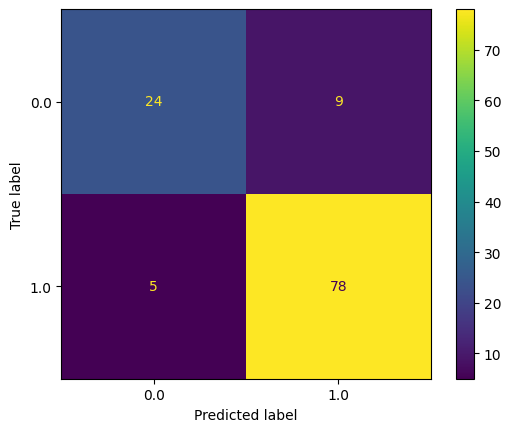

In [78]:
ConfusionMatrixDisplay.from_predictions(df_test["autor"], y_pred)

In [79]:
import statsmodels.api as sm

In [80]:
sm_model = sm.Logit(df_train["autor"], sm.add_constant(df_train[top_features])).fit()
sm_model.summary()

Optimization terminated successfully.
         Current function value: 0.279035
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  autor   No. Observations:                  269
Model:                          Logit   Df Residuals:                      264
Method:                           MLE   Df Model:                            4
Date:                Mon, 15 Dec 2025   Pseudo R-squ.:                  0.5366
Time:                        18:12:27   Log-Likelihood:                -75.060
converged:                       True   LL-Null:                       -161.97
Covariance Type:            nonrobust   LLR p-value:                 1.584e-36
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5516      0.580      0.952      0.341      -0.585       1.688
po            -0.5306      0.098     -5.435      0.000      -0.722      -0.339
mnie           0.5945      0.129      4.613      0.000       0.342       0.847
ja             0.5618      0.156      3.598      0.000       0.256       0.868
nawet          0.3996      0.139      2.882      0.004       0.128       0.671
==============================================================================
"""

#### 6.
Na podstawie wartości współczynników wybierz kilka (np. 10) słów najsilniej różnicujących autorów.



#### 7.
Zbuduj klasyfikator (regresja logistyczna) przewidujący autora segmentu na podstawie wybranych cech.



#### 8.
Podziel dane na zbiór treningowy i testowy oraz oceń jakość klasyfikacji (accuracy, macierz pomyłek).

#### 9.

Wypróbuj klasyfikator na fragmentach tekstów pochodzących od tych samych autorów, ale nieużytych w treningu (np. inne książki).